Loading library

In [166]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score,roc_curve,auc,precision_recall_curve
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

Loding Dataset

In [167]:
df=pd.read_csv('online_shoppers_intention.csv')

In [168]:
df.head(5)

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,UserCategory,IsWeekendVisit,MadePurchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [169]:
df['MadePurchase'].unique()

array([False,  True])

In [170]:
df['VisitMonth'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

checking for null values

In [171]:
df.isnull().sum()

AcctPagesViewed          0
AcctPageTime             0
InfoPagesViewed          0
InfoPageTime             0
ProductPagesViewed       0
ProductPageTime          0
AvgBounceRate            0
AvgExitRate              0
AvgPageValue             0
ProximityToSpecialDay    0
VisitMonth               0
UserOS                   0
UserBrowser              0
UserRegion               0
SourceChannel            0
UserCategory             0
IsWeekendVisit           0
MadePurchase             0
dtype: int64

finding info about each columns

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AcctPagesViewed        12330 non-null  int64  
 1   AcctPageTime           12330 non-null  float64
 2   InfoPagesViewed        12330 non-null  int64  
 3   InfoPageTime           12330 non-null  float64
 4   ProductPagesViewed     12330 non-null  int64  
 5   ProductPageTime        12330 non-null  float64
 6   AvgBounceRate          12330 non-null  float64
 7   AvgExitRate            12330 non-null  float64
 8   AvgPageValue           12330 non-null  float64
 9   ProximityToSpecialDay  12330 non-null  float64
 10  VisitMonth             12330 non-null  object 
 11  UserOS                 12330 non-null  int64  
 12  UserBrowser            12330 non-null  int64  
 13  UserRegion             12330 non-null  int64  
 14  SourceChannel          12330 non-null  int64  
 15  Us

droping irrelevent columns

In [173]:
df.drop('VisitMonth',axis=1,inplace=True)

encoding catogrical values

In [174]:
encoder=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
cat_cols=encoder.fit_transform(df[['UserCategory']])

In [175]:
cat_df=pd.DataFrame(cat_cols,
                    columns=encoder.get_feature_names_out(),
                    index=df.index
                   )

In [176]:
cat_df

,UserCategory_Other,UserCategory_Returning_Visitor
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
12325,0,1
12326,0,1
12327,0,1
12328,0,1


In [177]:
df=pd.concat([df.drop('UserCategory',axis=1),cat_df],axis=1)

using IQR method to remove outliers

In [178]:
Q1=df['AcctPageTime'].quantile(0.25)
Q3=df['AcctPageTime'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['AcctPageTime']>=Q1-1.5*IQR)&(df['AcctPageTime']<=Q3+1.5*IQR)]

dataset after preprocssing

In [179]:
df

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,UserOS,UserBrowser,UserRegion,SourceChannel,IsWeekendVisit,MadePurchase,UserCategory_Other,UserCategory_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False,0,1


using train test split

In [180]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('MadePurchase',axis=1),df['MadePurchase'],test_size=0.3,random_state=0)

using SMOTE to balance the imbalanced dataset

In [181]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_res, y_res = smote.fit_resample(x_train, y_train)
x_train=X_res
y_train=y_res

In [182]:
y_test

12321    False
8035     False
11385     True
2637     False
11739    False
         ...  
8569     False
6690     False
1563     False
2436     False
1636     False
Name: MadePurchase, Length: 3348, dtype: bool

In [183]:
y_train

0       False
1       False
2       False
3       False
4       False
        ...  
9974     True
9975     True
9976     True
9977     True
9978     True
Name: MadePurchase, Length: 9979, dtype: bool

Traing logistic regession model 

In [184]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\AI_ML\aimlenv\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

predicting values

In [185]:
y_pred_logistic=logistic_model.predict(x_test)

In [186]:
compare=pd.DataFrame(
    {
    'actual':y_test,
    'predicted':y_pred_logistic}
)

In [187]:
compare

,actual,predicted
12321,False,False
8035,False,False
11385,True,True
2637,False,False
11739,False,False
...,...,...
8569,False,False
6690,False,False
1563,False,False
2436,False,False


finding accuracy score and confusion matrix

In [188]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_logistic))
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print('cLassification report:')
print(classification_report(y_test, y_pred_logistic))

ROC AUC Score: 0.7958831834230341
Accuracy: 0.9089008363201911
Confusion Matrix:
 [[2748  139]
 [ 166  295]]
cLassification report:
              precision    recall  f1-score   support

       False       0.94      0.95      0.95      2887
        True       0.68      0.64      0.66       461

    accuracy                           0.91      3348
   macro avg       0.81      0.80      0.80      3348
weighted avg       0.91      0.91      0.91      3348



Here: 
    Accuracy is: 90% which is good.
    but recall for True is only 64%
therefore next models will focus on improving True recall 
since for Ecommerce buyer are more important to be classified correctly

In [189]:
y_proba_logistic = logistic_model.predict_proba(x_test)[:, 1] 

In [190]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_logistic))

ROC AUC Score: 0.8722931053785126


training Random Forest Classifier model

In [191]:
model=RandomForestClassifier(n_estimators=1000,max_depth=500,min_samples_split=3,random_state=0)

In [192]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=500, min_samples_split=3, n_estimators=1000,
                       random_state=0)

predicting values

In [193]:
y_pred_random=model.predict(x_test)

finding accuracy score and confusion matrix

In [194]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_random))
print(f"accuracy_score={accuracy_score(y_test,y_pred_random)}")
print(f"confusion_matrix={confusion_matrix(y_test,y_pred_random)}")
print("classification report:")
print(classification_report(y_test, y_pred_random))

ROC AUC Score: 0.834855102572907
accuracy_score=0.9100955794504182
confusion_matrix=[[2710  177]
 [ 124  337]]
classification report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95      2887
        True       0.66      0.73      0.69       461

    accuracy                           0.91      3348
   macro avg       0.81      0.83      0.82      3348
weighted avg       0.91      0.91      0.91      3348



Here accuracy is 91% and recall is incread form 64% to 73%.

In [195]:
y_proba_random = model.predict_proba(x_test)[:, 1] 

In [196]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_random))

ROC AUC Score: 0.9215749109441906


GradientBoostingClassifier

In [197]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

Predicting values

In [198]:
y_pred_gradient= model.predict(x_test)

finding accuracy score and confusion matrix and classification report

In [199]:
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gradient))
print(f"accuracy score : {accuracy_score(y_test,y_pred_gradient)}")
print(f"confusion matrixs:{confusion_matrix(y_test,y_pred_gradient)}")
print("classification report:")
print(classification_report(y_test, y_pred_gradient))

ROC AUC Score: 0.8409340397187783
accuracy score : 0.9080047789725209
confusion matrixs:[[2695  192]
 [ 116  345]]
classification report:
              precision    recall  f1-score   support

       False       0.96      0.93      0.95      2887
        True       0.64      0.75      0.69       461

    accuracy                           0.91      3348
   macro avg       0.80      0.84      0.82      3348
weighted avg       0.92      0.91      0.91      3348



Here recall is increaed to 75% but still need to be improved more therefore

using threshold tunning to imporve recall

In [200]:
y_proba= model.predict_proba(x_test)[:, 1] 

In [201]:
threshold = 0.35
y_pred= (y_proba >= threshold).astype(int)

finding accuracy score,confusion matrix,Classification report,ROC AUC Score

In [202]:
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print(f"accuracy score : {accuracy_score(y_test,y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.9232955420626686
accuracy score : 0.8975507765830346
Confusion Matrix:
[[2643  244]
 [  99  362]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.92      0.94      2887
        True       0.60      0.79      0.68       461

    accuracy                           0.90      3348
   macro avg       0.78      0.85      0.81      3348
weighted avg       0.91      0.90      0.90      3348



Here Recall is increased to 79% apporx 80% i.e model is able to find 80 percent of buyer from test data 

ploting confusion metrix

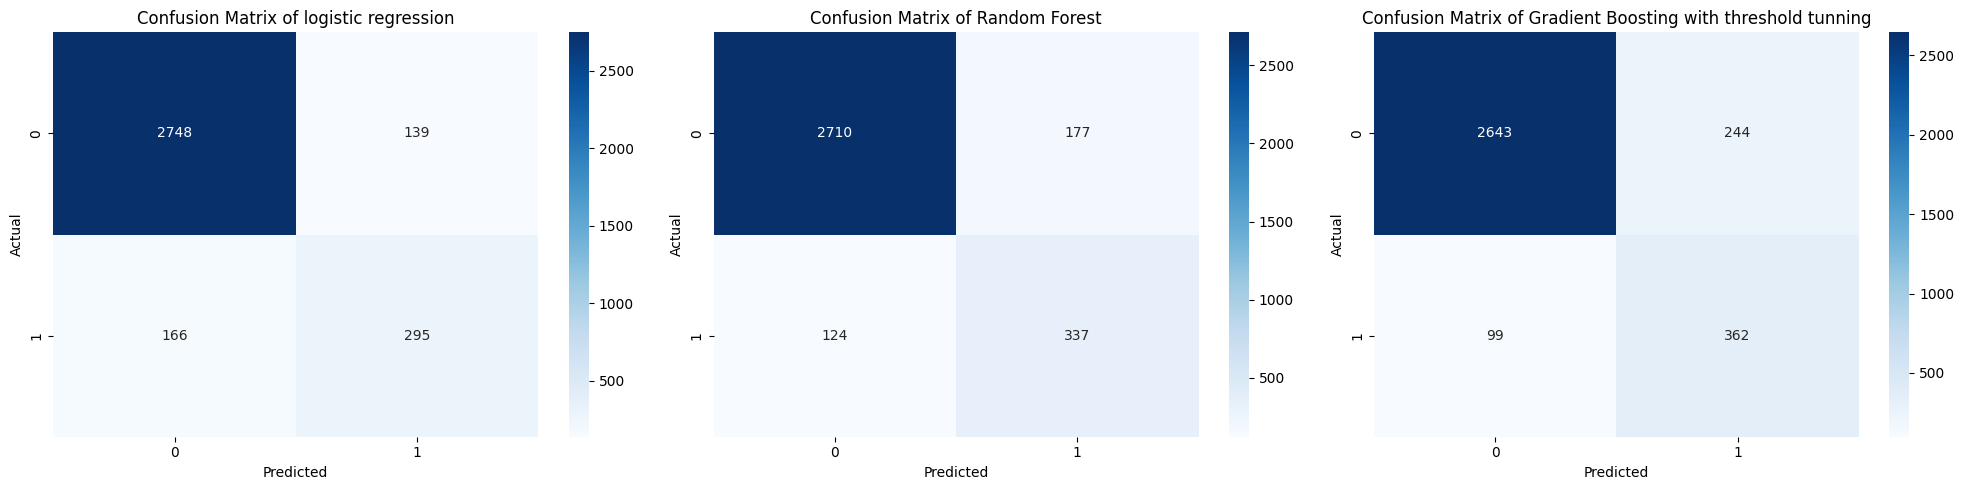

In [203]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of logistic regression')

plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_random)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest')

plt.subplot(1, 3, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Gradient Boosting with threshold tunning')
   
plt.tight_layout()
plt.show()


ploting Precision-Recall Curve

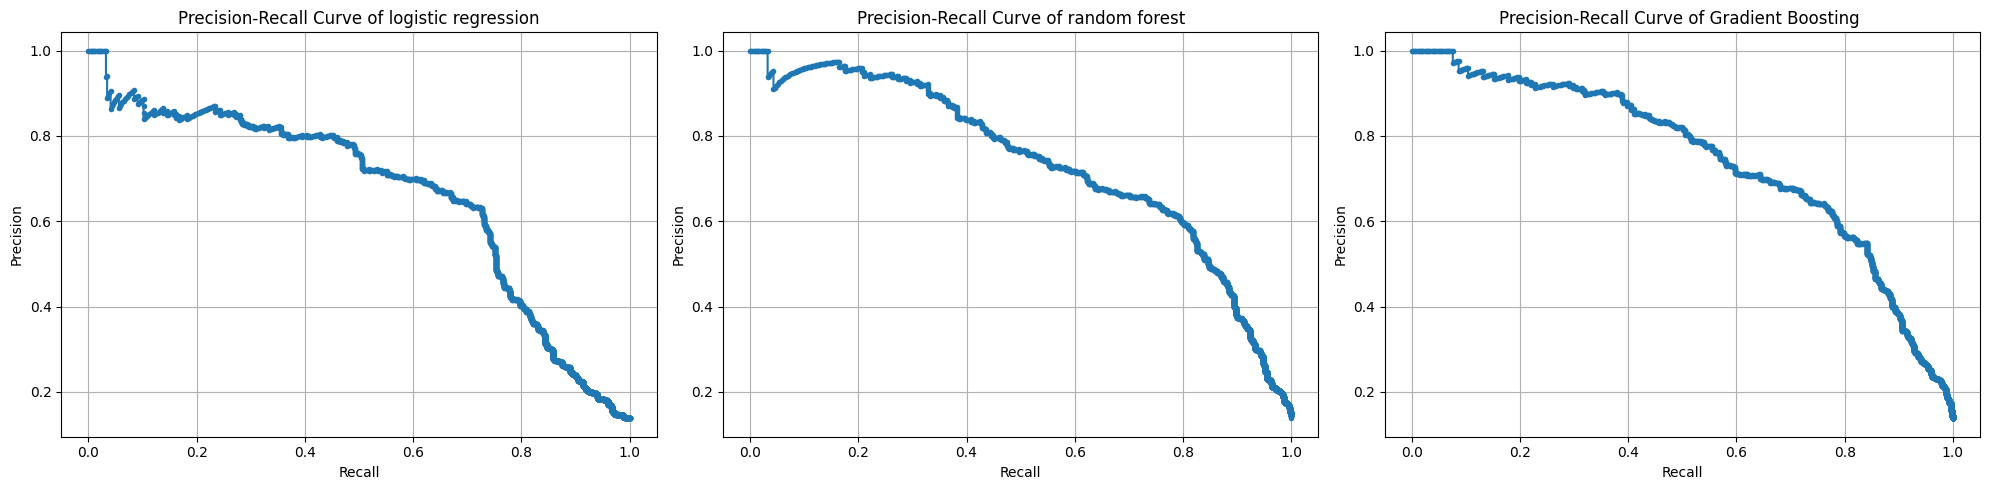

In [204]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
precision, recall, _ = precision_recall_curve(y_test, y_proba_logistic)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of logistic regression')
plt.grid()

plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test, y_proba_random)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of random forest')
plt.grid()

plt.subplot(1, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve of Gradient Boosting ')
plt.grid()

plt.tight_layout()
plt.show()

ploting ROC Curve

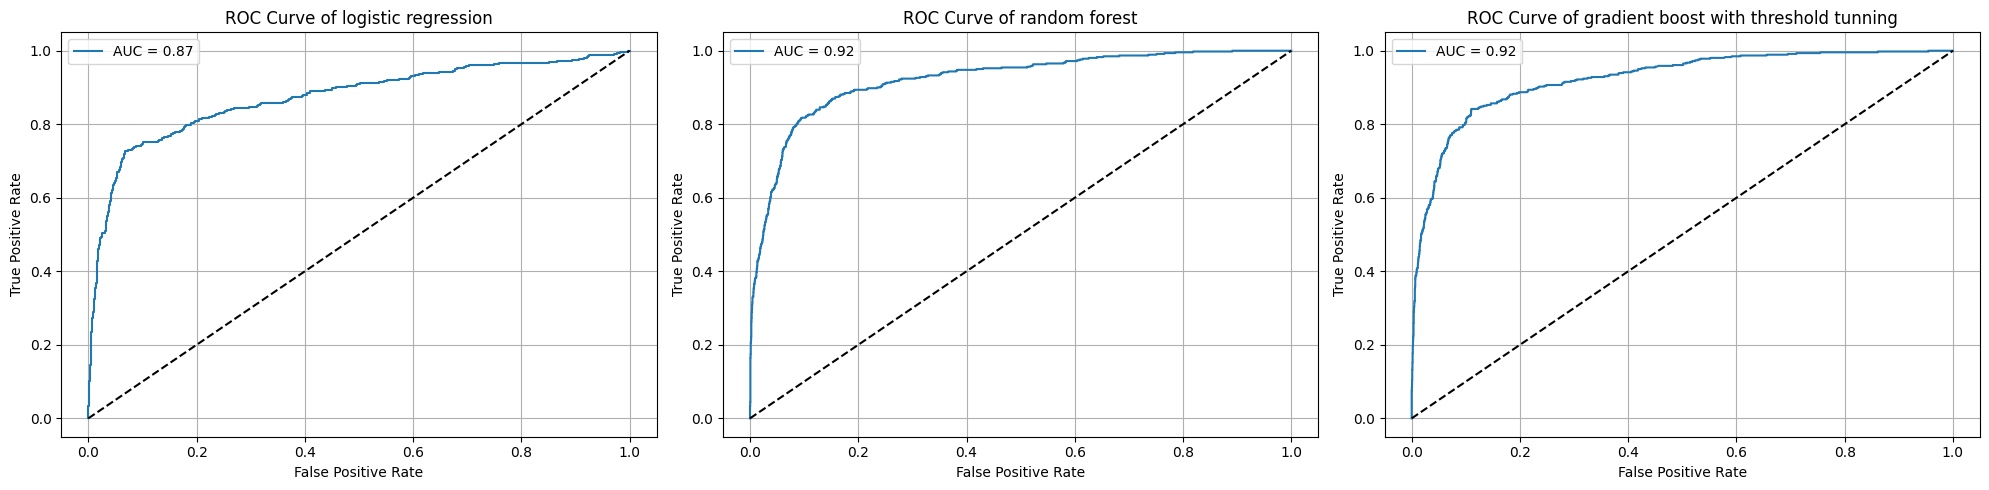

In [205]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
fpr, tpr, _ = roc_curve(y_test, y_proba_logistic)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of logistic regression')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba_random)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of random forest')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of gradient boost with threshold tunning')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()